In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

In [ ]:
path1 = '/content/drive/My Drive/ICITCOM 2025/lanina.csv'
path2 = '/content/drive/My Drive/ICITCOM 2025/elnino.csv'

In [ ]:
df1 = pd.read_csv(path1)
df2 = pd.read_csv(path2)

In [ ]:
df1['label'] = 'la nina'
df2['label'] = 'el nino'

In [ ]:
df = pd.concat([df1, df2], ignore_index=True)

In [ ]:
df.head()

,time,latitude,longitude,number,step,surface,valid_time,u10,v10,d2m,t2m,msl,meanSea,sst,sp,depthBelowLandLayer,stl1,label
0,2010-01-15 09:00:00,5.0,-170.00,0,0 days,0.0,2010-01-15 09:00:00,-11.188355,-6.573120,297.19226,301.02698,100823.125,0.0,302.27368,100821.7,0.0,302.27430,la nina
1,2010-01-15 09:00:00,5.0,-169.75,0,0 days,0.0,2010-01-15 09:00:00,-11.186401,-6.336792,297.21375,301.02112,100820.625,0.0,302.25513,100818.7,0.0,302.25476,la nina
2,2010-01-15 09:00:00,5.0,-169.50,0,0 days,0.0,2010-01-15 09:00:00,-11.038940,-6.203979,297.22350,301.07776,100818.125,0.0,302.25708,100817.7,0.0,302.25670,la nina
3,2010-01-15 09:00:00,5.0,-169.25,0,0 days,0.0,2010-01-15 09:00:00,-11.051636,-5.953003,297.21180,301.10706,100816.625,0.0,302.28150,100810.7,0.0,302.28210,la nina
4,2010-01-15 09:00:00,5.0,-169.00,0,0 days,0.0,2010-01-15 09:00:00,-11.010620,-5.703003,297.18250,301.14026,100816.375,0.0,302.27856,100817.7,0.0,302.27820,la nina


#Data Understanding

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

In [ ]:
df.head()

,time,latitude,longitude,number,step,surface,valid_time,u10,v10,d2m,t2m,msl,meanSea,sst,sp,depthBelowLandLayer,stl1,label
0,2010-01-15 09:00:00,5.0,-170.00,0,0 days,0.0,2010-01-15 09:00:00,-11.188355,-6.573120,297.19226,301.02698,100823.125,0.0,302.27368,100821.7,0.0,302.27430,la nina
1,2010-01-15 09:00:00,5.0,-169.75,0,0 days,0.0,2010-01-15 09:00:00,-11.186401,-6.336792,297.21375,301.02112,100820.625,0.0,302.25513,100818.7,0.0,302.25476,la nina
2,2010-01-15 09:00:00,5.0,-169.50,0,0 days,0.0,2010-01-15 09:00:00,-11.038940,-6.203979,297.22350,301.07776,100818.125,0.0,302.25708,100817.7,0.0,302.25670,la nina
3,2010-01-15 09:00:00,5.0,-169.25,0,0 days,0.0,2010-01-15 09:00:00,-11.051636,-5.953003,297.21180,301.10706,100816.625,0.0,302.28150,100810.7,0.0,302.28210,la nina
4,2010-01-15 09:00:00,5.0,-169.00,0,0 days,0.0,2010-01-15 09:00:00,-11.010620,-5.703003,297.18250,301.14026,100816.375,0.0,302.27856,100817.7,0.0,302.27820,la nina


In [ ]:
df.shape

(98892, 18)

In [ ]:
print("Missing values:\n", df.isnull().sum())

Missing values:
 time                   0
latitude               0
longitude              0
number                 0
step                   0
surface                0
valid_time             0
u10                    0
v10                    0
d2m                    0
t2m                    0
msl                    0
meanSea                0
sst                    0
sp                     0
depthBelowLandLayer    0
stl1                   0
label                  0
dtype: int64


In [ ]:
df['label'].value_counts()

,count
label,
la nina,49446
el nino,49446


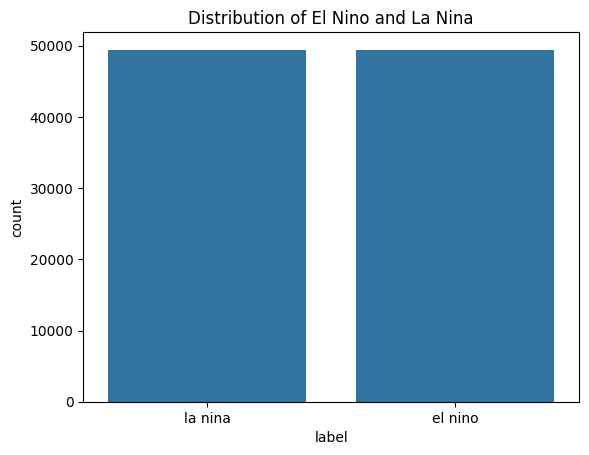

In [ ]:
# Visualize the distribution of the target variable (label)
sns.countplot(x='label', data=df)
plt.title("Distribution of El Nino and La Nina")
plt.show()

In [ ]:
# Analyze characteristics of each label
el_nino_stats = df[df['label'] == 'el nino'].describe()
la_nina_stats = df[df['label'] == 'la nina'].describe()

In [ ]:
print("\nCharacteristics of El Nino:\n", el_nino_stats)
print("\nCharacteristics of La Nina:\n", la_nina_stats)


Characteristics of El Nino:
           latitude     longitude   number  surface           u10  \
count  49446.00000  49446.000000  49446.0  49446.0  49446.000000   
mean       0.00000   -145.000000      0.0      0.0     -5.565486   
std        2.95807     14.505893      0.0      0.0      2.113598   
min       -5.00000   -170.000000      0.0      0.0    -11.054672   
25%       -2.50000   -157.500000      0.0      0.0     -7.014145   
50%        0.00000   -145.000000      0.0      0.0     -5.968460   
75%        2.50000   -132.500000      0.0      0.0     -4.449371   
max        5.00000   -120.000000      0.0      0.0      7.773453   

                v10           d2m           t2m            msl  meanSea  \
count  49446.000000  49446.000000  49446.000000   49446.000000  49446.0   
mean      -0.184548    296.508830    299.917458  100936.469646      0.0   
std        2.943076      1.414036      1.176407     201.580602      0.0   
min      -10.202042    292.140500    295.794920  100543.2

In [ ]:
# Perform t-tests and calculate ranges to identify significant differences between labels
features = ['u10', 'v10', 'd2m', 't2m', 'msl', 'sst',
            'sp', 'stl1']

t_test_results = {}
feature_ranges = {}

In [ ]:
for feature in features:
    t_stat, p_value = ttest_ind(
        df[df['label'] == 'el nino'][feature],
        df[df['label'] == 'la nina'][feature],
        nan_policy='omit'
    )
    el_nino_range = (df[df['label'] == 'el nino'][feature].min(), df[df['label'] == 'el nino'][feature].max())
    la_nina_range = (df[df['label'] == 'la nina'][feature].min(), df[df['label'] == 'la nina'][feature].max())
    t_test_results[feature] = {'t_stat': t_stat, 'p_value': p_value}
    feature_ranges[feature] = {'El Nino Range': el_nino_range, 'La Nina Range': la_nina_range}

In [ ]:
# Sort features by p-value
sorted_results = sorted(t_test_results.items(), key=lambda x: x[1]['p_value'])

print("\nT-Test Results with Ranges (sorted by significance):")
for feature, result in sorted_results:
    el_nino_range = feature_ranges[feature]['El Nino Range']
    la_nina_range = feature_ranges[feature]['La Nina Range']
    print(f"{feature}: t_stat = {result['t_stat']:.2f}, p_value = {result['p_value']:.2e}, "
          f"El Nino Range = {el_nino_range}, La Nina Range = {la_nina_range}")


T-Test Results with Ranges (sorted by significance):
u10: t_stat = 46.74, p_value = 0.00e+00, El Nino Range = (-11.054672, 7.7734528), La Nina Range = (-13.78511, 7.89653)
v10: t_stat = -65.28, p_value = 0.00e+00, El Nino Range = (-10.202042, 6.925995), La Nina Range = (-10.954086, 9.750015)
d2m: t_stat = 132.81, p_value = 0.00e+00, El Nino Range = (292.1405, 299.39697), La Nina Range = (292.3739, 298.95984)
t2m: t_stat = 173.17, p_value = 0.00e+00, El Nino Range = (295.79492, 302.8485), La Nina Range = (294.292, 303.109)
msl: t_stat = -192.47, p_value = 0.00e+00, El Nino Range = (100543.25, 101353.625), La Nina Range = (100577.06, 101450.875)
sst: t_stat = 172.55, p_value = 0.00e+00, El Nino Range = (296.2981, 304.02832), La Nina Range = (294.98413, 304.18286)
sp: t_stat = -192.44, p_value = 0.00e+00, El Nino Range = (100542.37, 101353.875), La Nina Range = (100578.64, 101452.91)
stl1: t_stat = 172.55, p_value = 0.00e+00, El Nino Range = (296.29773, 304.02856), La Nina Range = (294.9

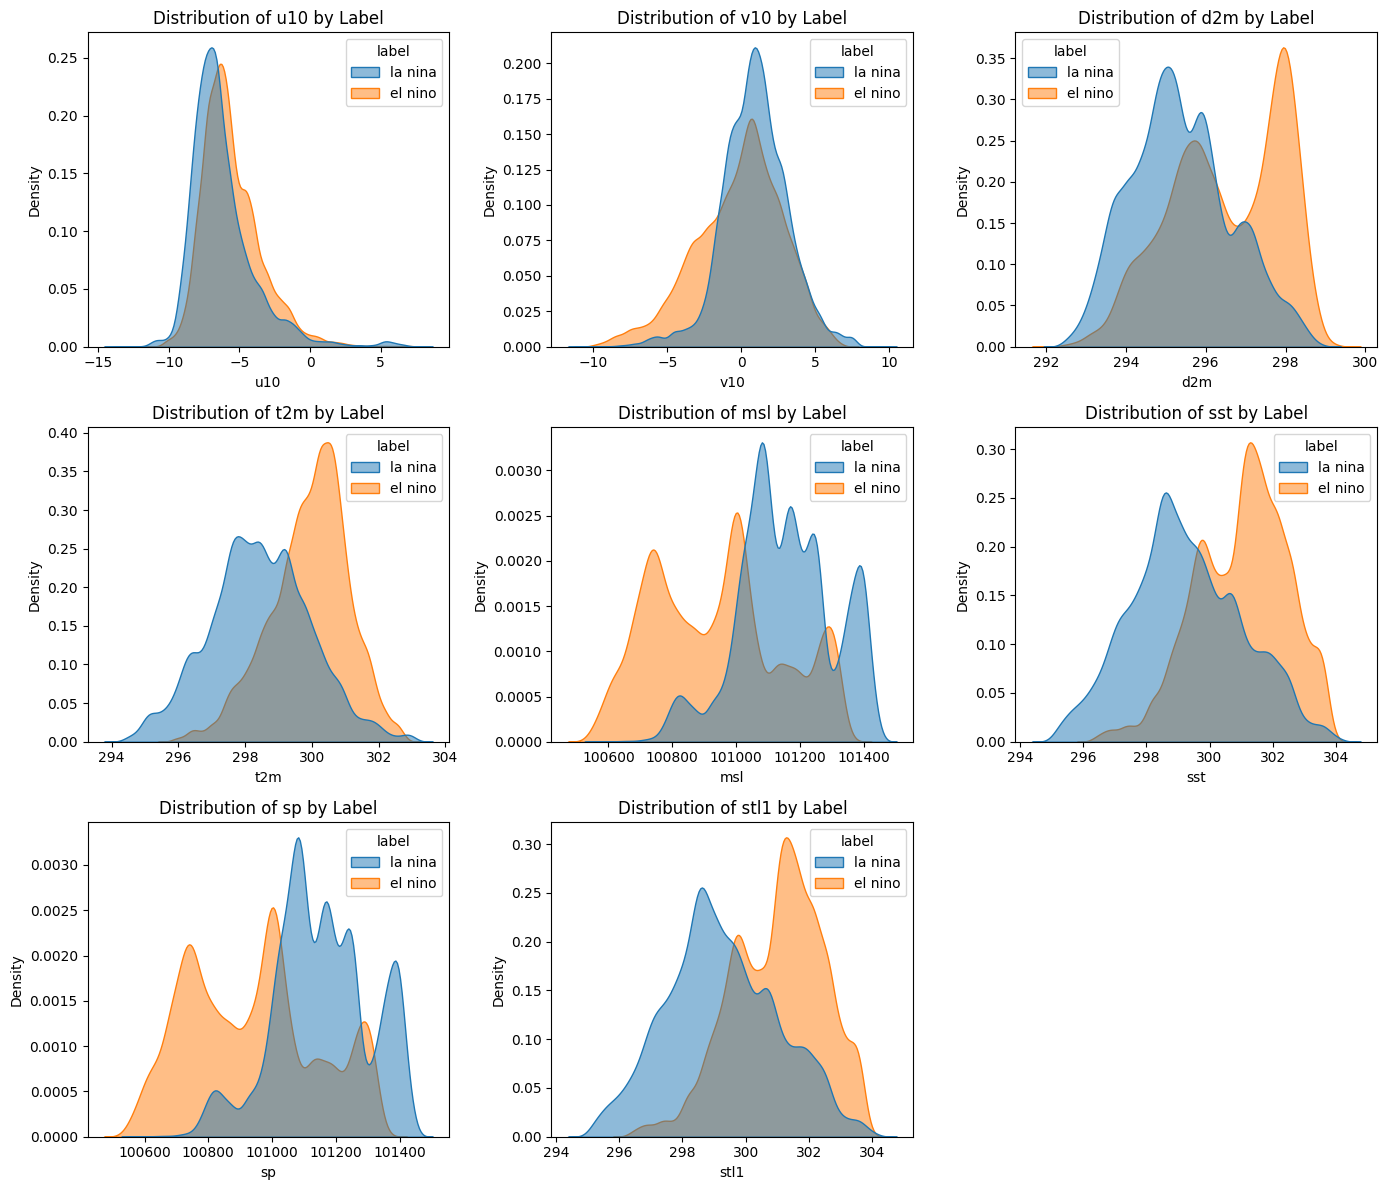

In [ ]:
# Visualize feature distributions by label in subplots
plt.figure(figsize=(14, 12))
for i, feature in enumerate(features, 1):
    plt.subplot(3, 3, i)
    sns.kdeplot(data=df, x=feature, hue='label', fill=True, common_norm=False, alpha=0.5)
    plt.title(f"Distribution of {feature} by Label")
plt.tight_layout()
plt.show()

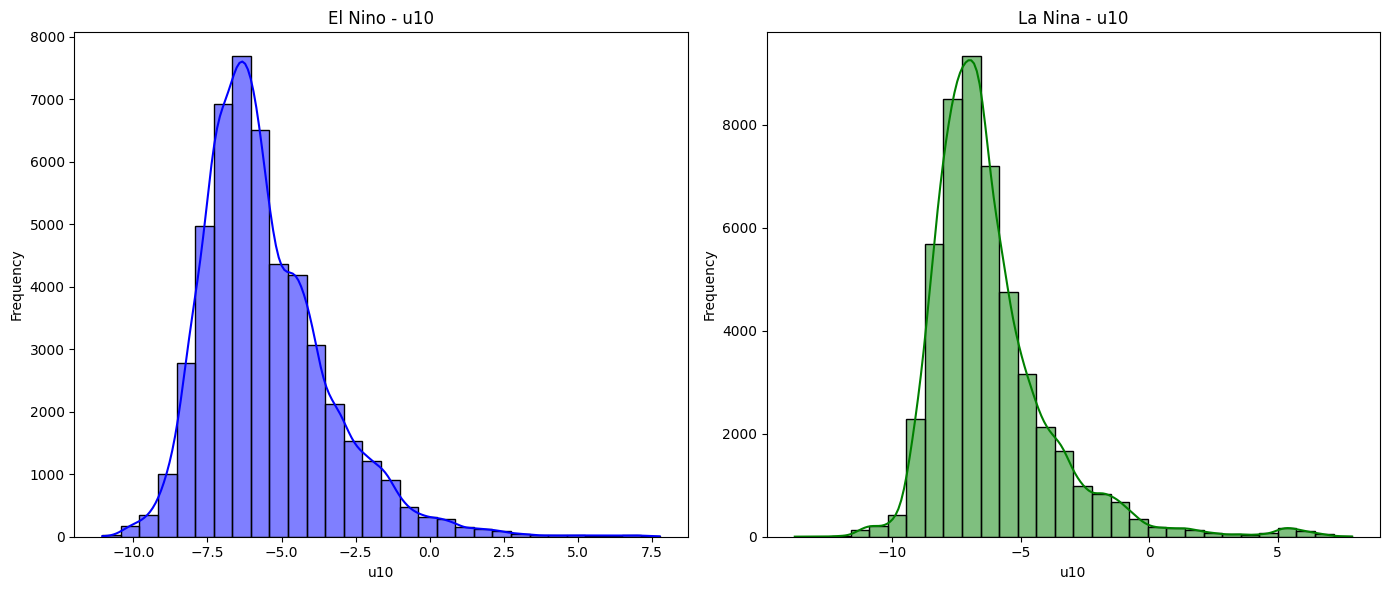

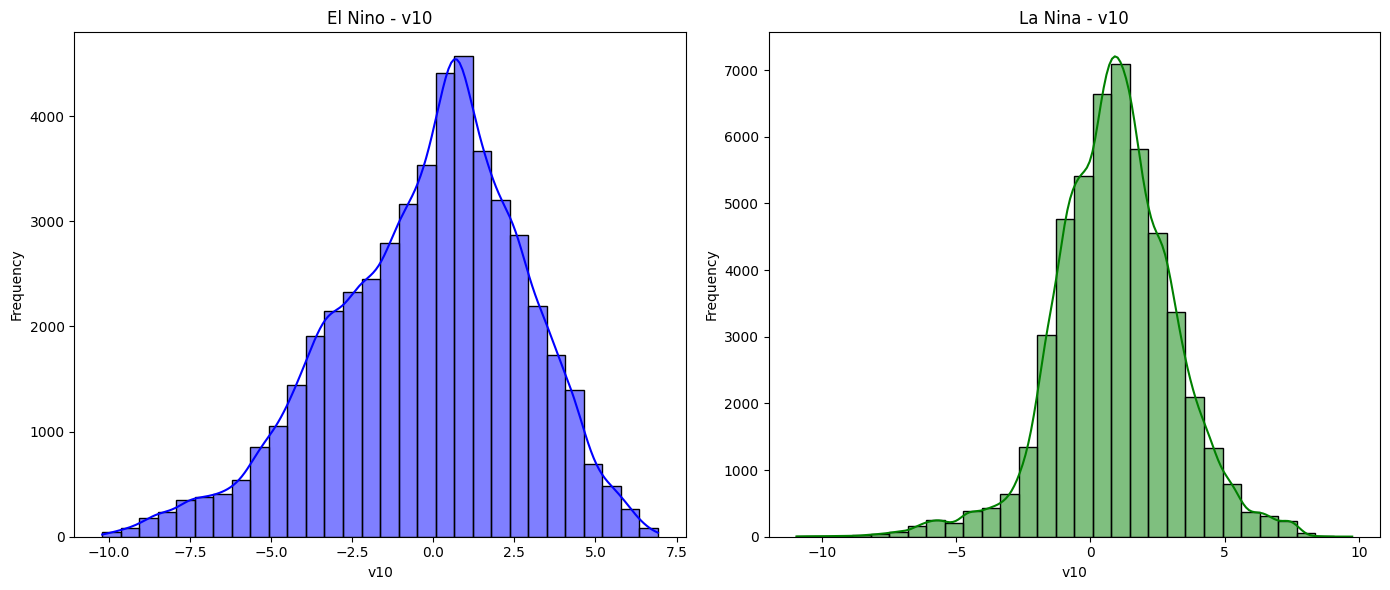

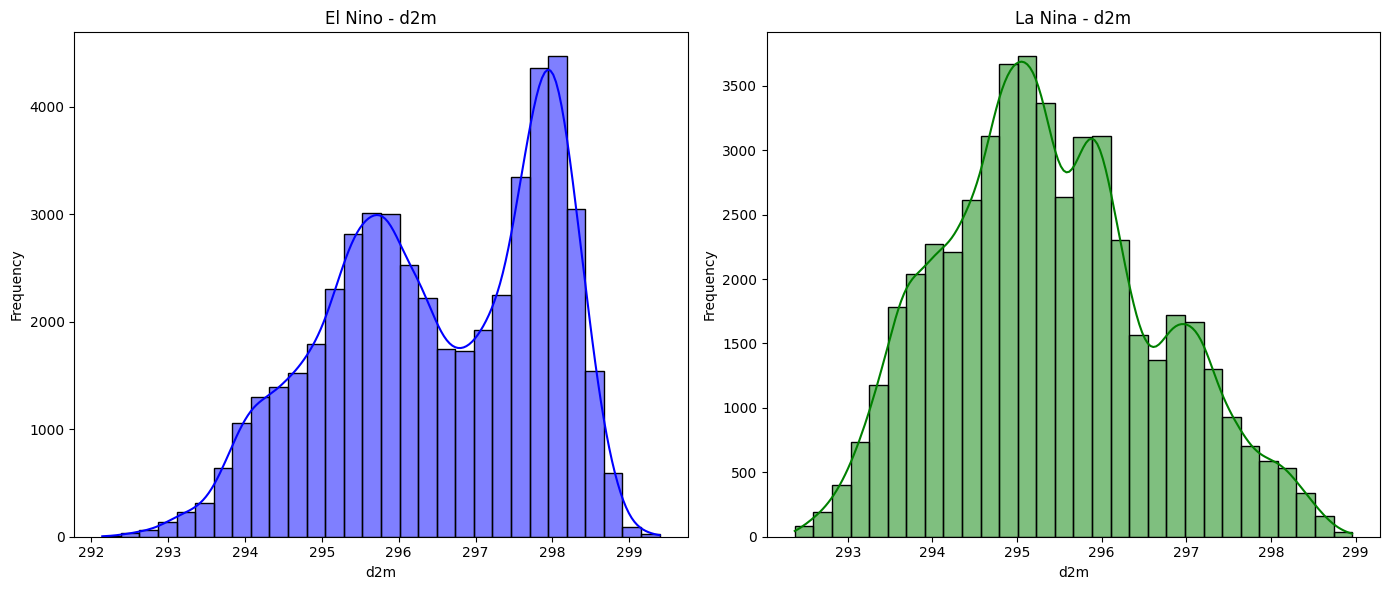

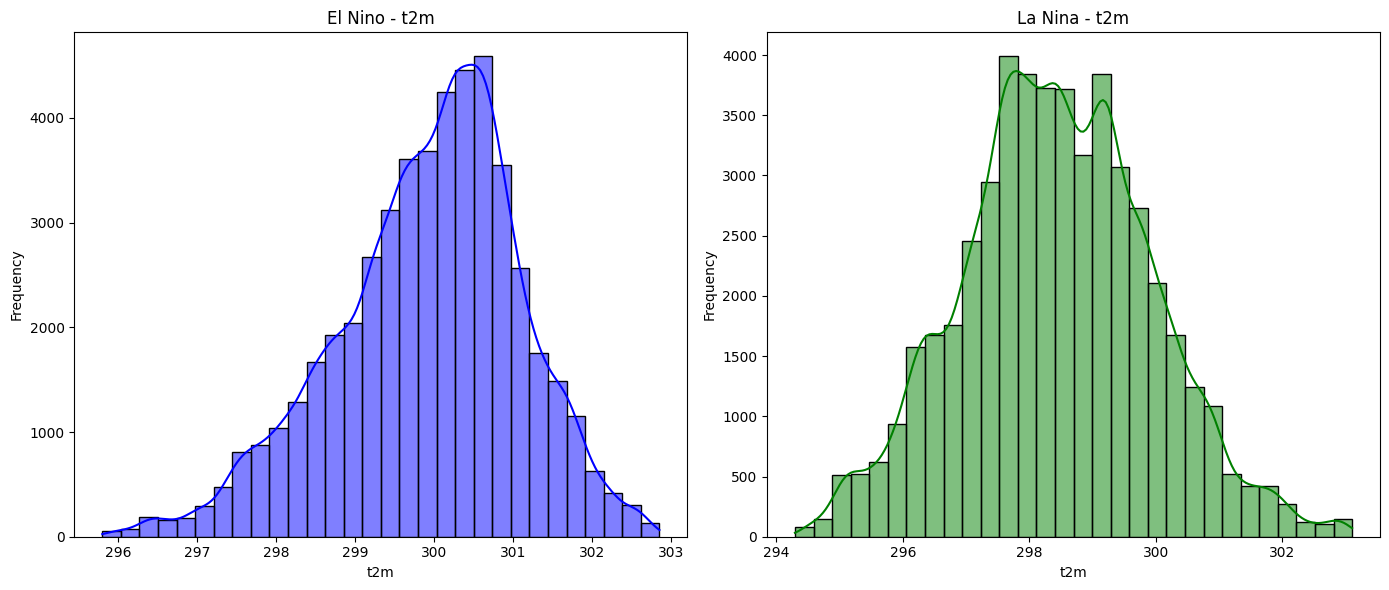

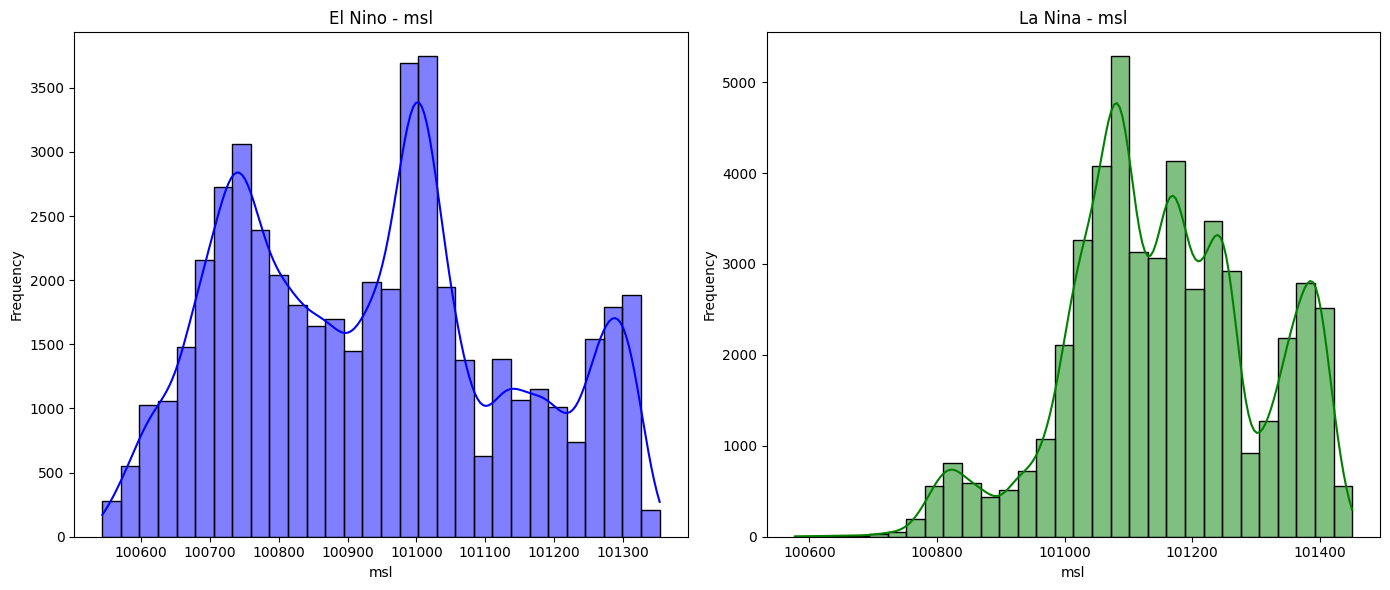

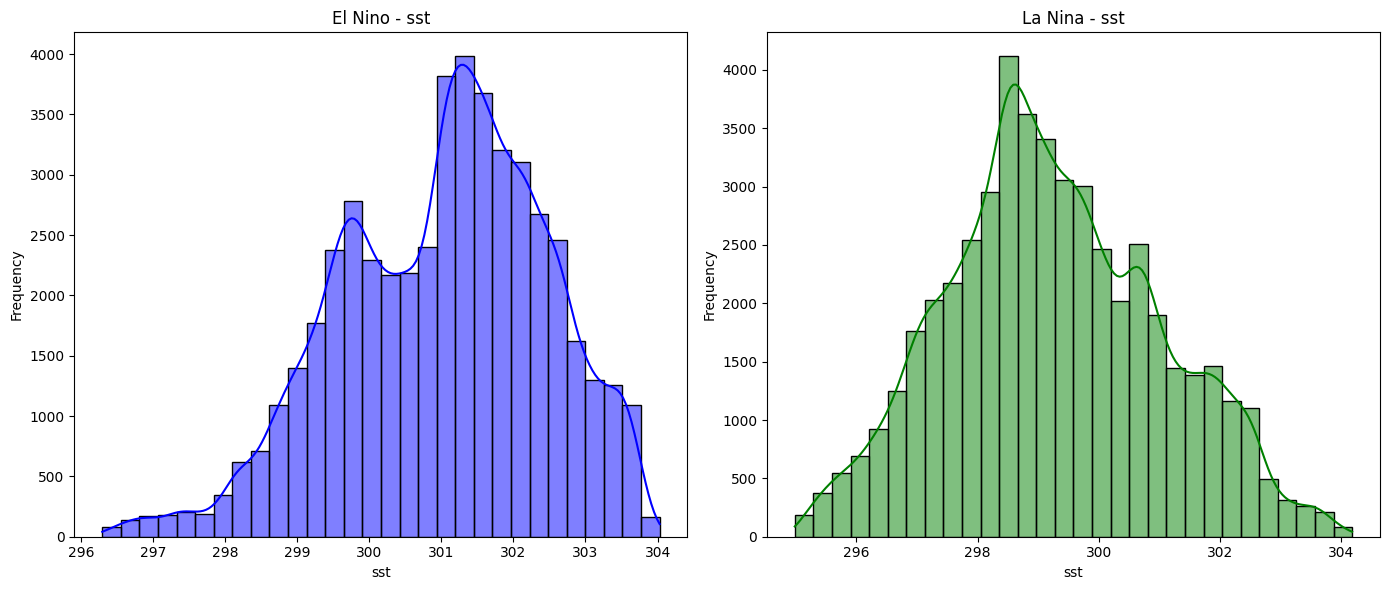

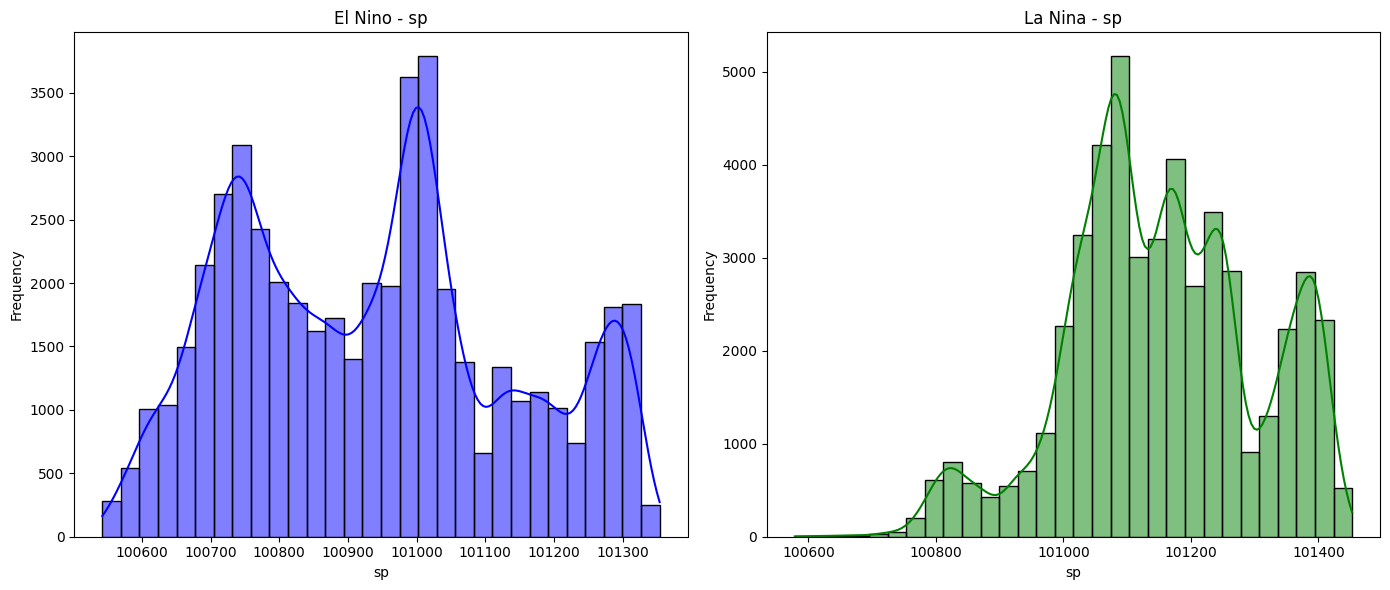

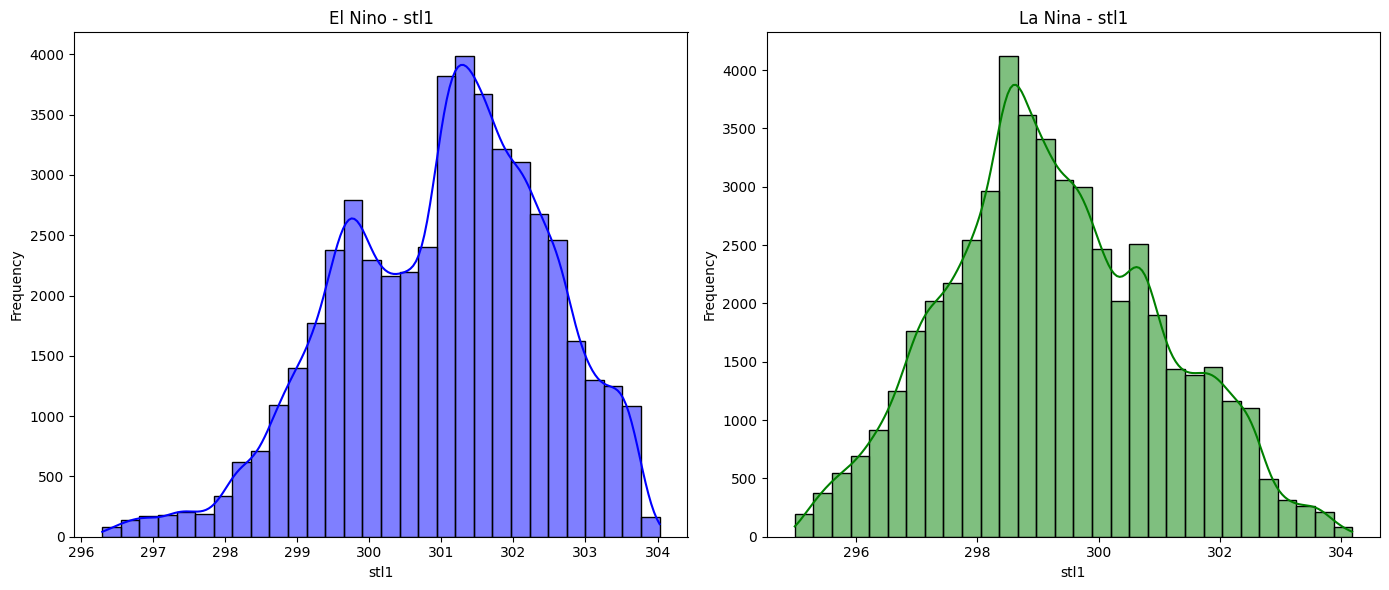

In [ ]:
# Advanced: Visualize each feature separately for each label
for feature in features:
    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)
    sns.histplot(df[df['label'] == 'el nino'][feature], kde=True, bins=30, color='blue')
    plt.title(f"El Nino - {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")

    plt.subplot(1, 2, 2)
    sns.histplot(df[df['label'] == 'la nina'][feature], kde=True, bins=30, color='green')
    plt.title(f"La Nina - {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")

    plt.tight_layout()
    plt.show()

#PreProcessing

###Missing Value

In [ ]:
features = ['u10', 'v10', 'd2m', 't2m', 'msl', 'sst',
            'sp', 'stl1']

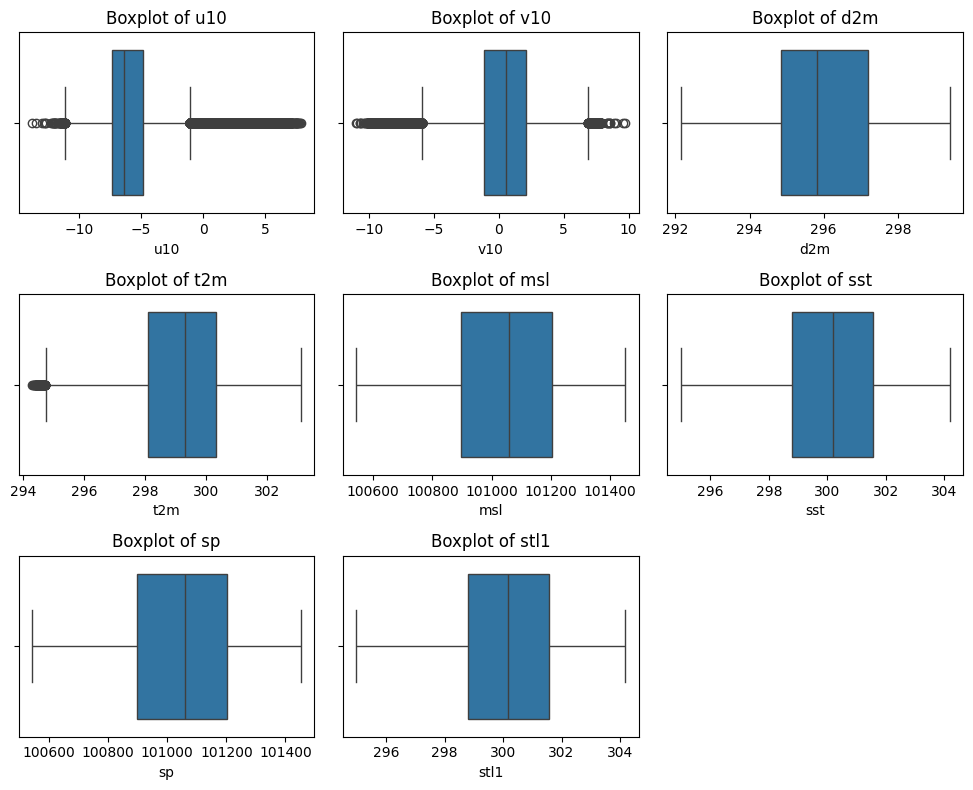

In [ ]:
plt.figure(figsize=(10, 8))
for i, feature in enumerate(features):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()

In [ ]:
for feature in features:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
    print(f"{feature}: Found {len(outliers)} outliers")

u10: Found 3390 outliers
v10: Found 2673 outliers
d2m: Found 0 outliers
t2m: Found 141 outliers
msl: Found 0 outliers
sst: Found 0 outliers
sp: Found 0 outliers
stl1: Found 0 outliers


In [ ]:
df['label_encoded'] = df['label'].map({'la nina': 0, 'el nino': 1})
df.head()

,time,latitude,longitude,number,step,surface,valid_time,u10,v10,d2m,t2m,msl,meanSea,sst,sp,depthBelowLandLayer,stl1,label,label_encoded
0,2010-01-15 09:00:00,5.0,-170.00,0,0 days,0.0,2010-01-15 09:00:00,-11.188355,-6.573120,297.19226,301.02698,100823.125,0.0,302.27368,100821.7,0.0,302.27430,la nina,0
1,2010-01-15 09:00:00,5.0,-169.75,0,0 days,0.0,2010-01-15 09:00:00,-11.186401,-6.336792,297.21375,301.02112,100820.625,0.0,302.25513,100818.7,0.0,302.25476,la nina,0
2,2010-01-15 09:00:00,5.0,-169.50,0,0 days,0.0,2010-01-15 09:00:00,-11.038940,-6.203979,297.22350,301.07776,100818.125,0.0,302.25708,100817.7,0.0,302.25670,la nina,0
3,2010-01-15 09:00:00,5.0,-169.25,0,0 days,0.0,2010-01-15 09:00:00,-11.051636,-5.953003,297.21180,301.10706,100816.625,0.0,302.28150,100810.7,0.0,302.28210,la nina,0
4,2010-01-15 09:00:00,5.0,-169.00,0,0 days,0.0,2010-01-15 09:00:00,-11.010620,-5.703003,297.18250,301.14026,100816.375,0.0,302.27856,100817.7,0.0,302.27820,la nina,0


In [ ]:
df.drop('label', axis=1, inplace=True)
df.drop('meanSea', axis=1, inplace=True)
df.drop('depthBelowLandLayer', axis=1, inplace=True)
df.drop('number', axis=1, inplace=True)
df.drop('step', axis=1, inplace=True)
df.drop('surface', axis=1, inplace=True)
df.drop('valid_time', axis=1, inplace=True)
df.head()

,time,latitude,longitude,u10,v10,d2m,t2m,msl,sst,sp,stl1,label_encoded
0,2010-01-15 09:00:00,5.0,-170.00,-11.188355,-6.573120,297.19226,301.02698,100823.125,302.27368,100821.7,302.27430,0
1,2010-01-15 09:00:00,5.0,-169.75,-11.186401,-6.336792,297.21375,301.02112,100820.625,302.25513,100818.7,302.25476,0
2,2010-01-15 09:00:00,5.0,-169.50,-11.038940,-6.203979,297.22350,301.07776,100818.125,302.25708,100817.7,302.25670,0
3,2010-01-15 09:00:00,5.0,-169.25,-11.051636,-5.953003,297.21180,301.10706,100816.625,302.28150,100810.7,302.28210,0
4,2010-01-15 09:00:00,5.0,-169.00,-11.010620,-5.703003,297.18250,301.14026,100816.375,302.27856,100817.7,302.27820,0


In [ ]:
print("Missing values:\n", df.isnull().sum())

Missing values:
 time             0
latitude         0
longitude        0
u10              0
v10              0
d2m              0
t2m              0
msl              0
sst              0
sp               0
stl1             0
label_encoded    0
dtype: int64


In [ ]:
df.head()

,time,latitude,longitude,u10,v10,d2m,t2m,msl,sst,sp,stl1,label_encoded
0,2010-01-15 09:00:00,5.0,-170.00,-11.188355,-6.573120,297.19226,301.02698,100823.125,302.27368,100821.7,302.27430,0
1,2010-01-15 09:00:00,5.0,-169.75,-11.186401,-6.336792,297.21375,301.02112,100820.625,302.25513,100818.7,302.25476,0
2,2010-01-15 09:00:00,5.0,-169.50,-11.038940,-6.203979,297.22350,301.07776,100818.125,302.25708,100817.7,302.25670,0
3,2010-01-15 09:00:00,5.0,-169.25,-11.051636,-5.953003,297.21180,301.10706,100816.625,302.28150,100810.7,302.28210,0
4,2010-01-15 09:00:00,5.0,-169.00,-11.010620,-5.703003,297.18250,301.14026,100816.375,302.27856,100817.7,302.27820,0


### Correlation heatmap

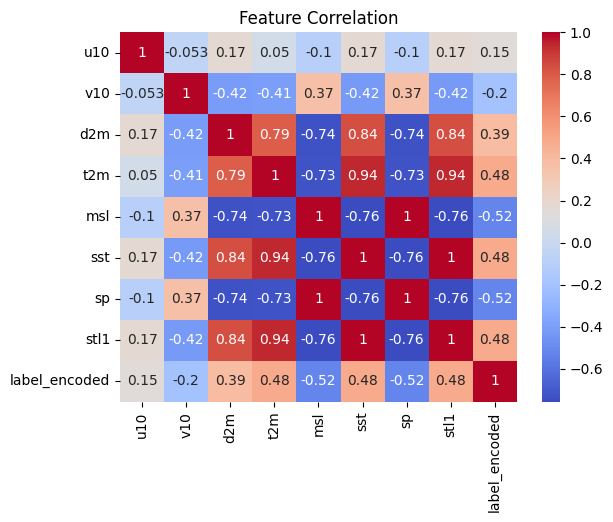

In [ ]:
correlation_matrix = df[features + ['label_encoded']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Feature Correlation')
plt.show()

### Pairplot for feature interactions

In [ ]:
sns.pairplot(df[features + ['label_encoded']], hue='label_encoded')
plt.show()

# Split Data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df[features]
y = df['label_encoded']

In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:
print(f"Training set size: {X_train.shape[0]}")
print(f"Validation set size: {X_val.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

#Normalization

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()
X_train[features] = scaler.fit_transform(X_train[features])
X_val[features] = scaler.transform(X_val[features])
X_test[features] = scaler.transform(X_test[features])

In [ ]:
X_train.head()

,u10,v10,d2m,t2m,msl,sst,sp,stl1
37175,0.401966,0.657735,0.329847,0.384589,0.926849,0.324777,0.925259,0.324835
3815,0.414696,0.711198,0.575456,0.442662,0.553933,0.399540,0.550091,0.399580
65065,0.246815,0.671953,0.516528,0.554735,0.506681,0.514819,0.508565,0.514745
44731,0.343112,0.638690,0.366844,0.382919,0.882976,0.334663,0.881259,0.334563
63439,0.262985,0.690820,0.458095,0.601032,0.496763,0.530599,0.496471,0.530736


In [ ]:
X_val.head()

,u10,v10,d2m,t2m,msl,sst,sp,stl1
70564,0.512027,0.506805,0.769545,0.869445,0.123984,0.945920,0.125338,0.945670
55136,0.377612,0.511051,0.311551,0.687550,0.754512,0.571299,0.755882,0.571381
57594,0.299511,0.430206,0.387734,0.624195,0.724755,0.610001,0.723998,0.609972
54887,0.556019,0.572228,0.703109,0.533594,0.809891,0.701050,0.807557,0.701017
51794,0.340047,0.599868,0.405480,0.588976,0.837719,0.609892,0.837242,0.609972


In [ ]:
X_test.head()

,u10,v10,d2m,t2m,msl,sst,sp,stl1
15871,0.371498,0.758596,0.456662,0.552576,0.547800,0.536489,0.550025,0.536448
39634,0.252926,0.529298,0.505691,0.529905,0.623364,0.513060,0.622908,0.513106
16048,0.327763,0.714259,0.485333,0.615931,0.588577,0.568899,0.586307,0.568855
63345,0.374191,0.433757,0.486766,0.673691,0.502273,0.645743,0.498670,0.645659
72359,0.302362,0.684202,0.613360,0.632863,0.293704,0.638226,0.294654,0.638211


#Modelling

In [ ]:
# !pip install scikit-learn==1.2.2

In [ ]:
# Helper function to evaluate models
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix, roc_curve
from sklearn.model_selection import RandomizedSearchCV

def evaluate_model(model, X_val, y_val, X_test, y_test, model_name, ax=None, color=None):
    # Validation performance
    y_val_pred = model.predict(X_val)
    y_val_prob = model.predict_proba(X_val)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_val)

    val_accuracy = accuracy_score(y_val, y_val_pred)
    val_roc_auc = roc_auc_score(y_val, y_val_prob)

    # Test performance
    y_test_pred = model.predict(X_test)
    y_test_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_test)

    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_roc_auc = roc_auc_score(y_test, y_test_prob)

    print(f"\n{model_name} Validation Results:")
    print(f"Validation Accuracy: {val_accuracy:.4f}")
    print(f"Validation ROC AUC: {val_roc_auc:.4f}")

    print(f"\n{model_name} Test Results:")
    print(f"Test Accuracy: {test_accuracy:.4f}")
    print(f"Test ROC AUC: {test_roc_auc:.4f}")
    print("Classification Report:\n", classification_report(y_test, y_test_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))

    # Plot ROC Curve for test set
    if ax:
        fpr, tpr, _ = roc_curve(y_test, y_test_prob)
        ax.plot(fpr, tpr, label=f'{model_name} (AUC = {test_roc_auc:.2f})', lw=2, color=color)

    return val_accuracy, val_roc_auc, test_accuracy, test_roc_auc

In [ ]:
# Initialize plot
plt.figure(figsize=(10, 8))
colors = ['darkorange', 'blue', 'green', 'red', 'purple', 'cyan', 'magenta']
results = []

<Figure size 1000x800 with 0 Axes>

###Model 1: Logistic Regression

In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

param_dist_logreg = {
    'C': np.logspace(-3, 3, 5),  # Reduced range
    'solver': ['liblinear', 'lbfgs'],
    'max_iter': [200, 500]
}

In [ ]:
logreg = LogisticRegression()
logreg_search = RandomizedSearchCV(estimator=logreg, param_distributions=param_dist_logreg, n_iter=10, scoring='accuracy', cv=3, random_state=42, n_jobs=-1)
print("\nTraining Logistic Regression...")
logreg_search.fit(X_train, y_train)
best_logreg = logreg_search.best_estimator_
print("Best Parameters for Logistic Regression:", logreg_search.best_params_)
results.append(("Logistic Regression", *evaluate_model(best_logreg, X_val, y_val, X_test, y_test, "Logistic Regression", ax=plt.gca(), color=colors[0])))

###Model 2: Random Forest

In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

param_dist_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 20, None],  # Reduced range
    'min_samples_split': [2, 5]
}

In [ ]:
rf = RandomForestClassifier(random_state=42)
rf_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist_rf, n_iter=10, scoring='accuracy', cv=3, random_state=42, n_jobs=-1)
print("\nTraining Random Forest...")
rf_search.fit(X_train, y_train)
best_rf = rf_search.best_estimator_
print("Best Parameters for Random Forest:", rf_search.best_params_)
results.append(("Random Forest (Tuned)", *evaluate_model(best_rf, X_val, y_val, X_test, y_test, "Random Forest", ax=plt.gca(), color=colors[1])))

###Model 3: XGBoost

In [ ]:
# XGBoost
from xgboost import XGBClassifier

param_dist_xgb = {
    'n_estimators': [50, 100, 150],
    'max_depth': [6, 8, 10],
    'learning_rate': [0.01, 0.1, 0.2]
}

In [ ]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_search = RandomizedSearchCV(estimator=xgb, param_distributions=param_dist_xgb, n_iter=10, scoring='accuracy', cv=3, random_state=42, n_jobs=-1)
print("\nTraining XGBoost...")
xgb_search.fit(X_train, y_train)
best_xgb = xgb_search.best_estimator_
print("Best Parameters for XGBoost:", xgb_search.best_params_)
results.append(("XGBoost", *evaluate_model(best_xgb, X_val, y_val, X_test, y_test, "XGBoost", ax=plt.gca(), color=colors[2])))

###Model 4: Support Vector Classifier (SVC)

In [ ]:
# Support Vector Classifier (SVC)
from sklearn.svm import SVC

In [ ]:
svc = SVC(C=1.0, kernel='rbf', gamma='scale', probability=True)
svc.fit(X_train, y_train)

# Manually mimic the best_estimator_ attribute
svc.best_estimator_ = svc

# Evaluate and store results
results.append((
    "Support Vector Classifier",
    *evaluate_model(
        svc.best_estimator_, X_val, y_val, X_test, y_test,
        model_name="Support Vector Classifier",
        ax=plt.gca(), color=colors[3]
    )
))

###Model 5: Gradient Boosting Classifier

In [ ]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

param_dist_gbc = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

In [ ]:
gbc = GradientBoostingClassifier(random_state=42)
gbc_search = RandomizedSearchCV(estimator=gbc, param_distributions=param_dist_gbc, scoring='accuracy', cv=5)
print("\nTraining Gradient Boosting Classifier...")
gbc_search.fit(X_train, y_train)
best_gbc = gbc_search.best_estimator_
print("Best Parameters for Gradient Boosting Classifier:", gbc_search.best_params_)
results.append(("Gradient Boosting Classifier", *evaluate_model(best_gbc, X_val, y_val, X_test, y_test, "Gradient Boosting Classifier", ax=plt.gca(), color=colors[4])))

###Model 6: Voting Classifier

In [ ]:
# Add Voting Classifier
from sklearn.ensemble import VotingClassifier

In [ ]:
voting_clf = VotingClassifier(estimators=[
    ('logreg', best_logreg), ('rf', best_rf), ('xgb', best_xgb), ('svc', svc)
], voting='soft')
voting_clf.fit(X_train, y_train)
results.append(("Voting Classifier", *evaluate_model(voting_clf, X_val, y_val, X_test, y_test, "Voting Classifier", ax=plt.gca(), color=colors[5])))

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [13:34:29] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


###Model 7: Bagging Classifier

In [ ]:
# Add Bagging Classifier
from sklearn.ensemble import BaggingClassifier

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [12:45:08] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [12:45:19] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [12:45:31] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [12:45:46] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [12:45:56] WARNING: /w


Bagging Classifier Validation Results:
Validation Accuracy: 0.9914
Validation ROC AUC: 0.9997

Bagging Classifier Test Results:
Test Accuracy: 0.9927
Test ROC AUC: 0.9997
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      9920
           1       0.99      0.99      0.99      9859

    accuracy                           0.99     19779
   macro avg       0.99      0.99      0.99     19779
weighted avg       0.99      0.99      0.99     19779

Confusion Matrix:
 [[9836   84]
 [  61 9798]]


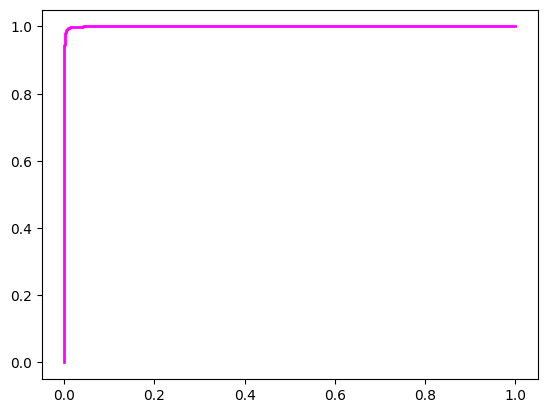

In [ ]:
bagging_clf = BaggingClassifier(estimator=best_xgb, n_estimators=10, random_state=42)
bagging_clf.fit(X_train, y_train)
results.append(("Bagging Classifier", *evaluate_model(bagging_clf, X_val, y_val, X_test, y_test, "Bagging Classifier", ax=plt.gca(), color=colors[6])))

###Model 8: Stacking Classifier

In [ ]:
# Add Stacking Classifier
from sklearn.ensemble import StackingClassifier

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [12:47:28] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [12:48:41] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [12:48:51] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [12:48:55] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [12:49:05] WARNING: /w


Stacking Classifier Validation Results:
Validation Accuracy: 0.9941
Validation ROC AUC: 0.9997

Stacking Classifier Test Results:
Test Accuracy: 0.9954
Test ROC AUC: 0.9998
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00      9920
           1       0.99      1.00      1.00      9859

    accuracy                           1.00     19779
   macro avg       1.00      1.00      1.00     19779
weighted avg       1.00      1.00      1.00     19779

Confusion Matrix:
 [[9870   50]
 [  40 9819]]


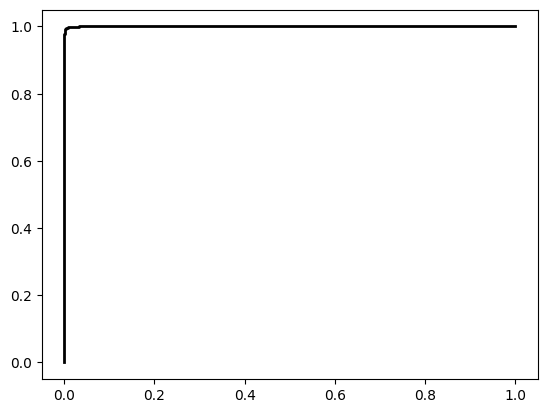

In [ ]:
stacking_clf = StackingClassifier(estimators=[
    ('logreg', best_logreg), ('rf', best_rf), ('xgb', best_xgb)
], final_estimator=LogisticRegression())
stacking_clf.fit(X_train, y_train)
results.append(("Stacking Classifier", *evaluate_model(stacking_clf, X_val, y_val, X_test, y_test, "Stacking Classifier", ax=plt.gca(), color='black')))

###Plot

/tmp/ipython-input-2976710372.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='lower right', fontsize=12)


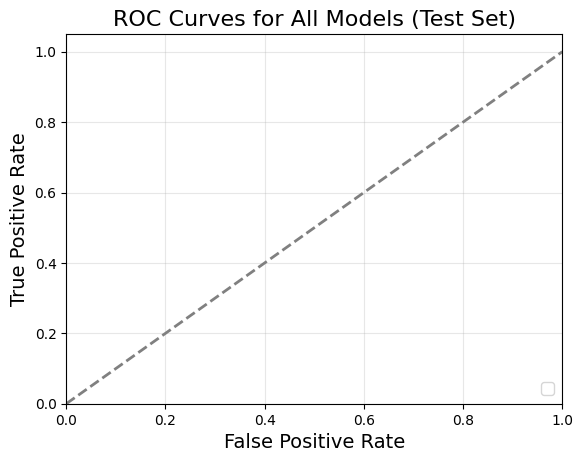

In [ ]:
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)  # Reference diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC Curves for All Models (Test Set)', fontsize=16)
plt.legend(loc='lower right', fontsize=12)
plt.grid(alpha=0.3)
plt.show()

###Summary

In [ ]:
print("\nSummary of Model Performance:")
print("="*80)
for model_name, val_accuracy, val_roc_auc, test_accuracy, test_roc_auc in results:
    print(f"{model_name}:")
    print(f"  Validation - Accuracy: {val_accuracy:.4f}, ROC AUC: {val_roc_auc:.4f}")
    print(f"  Test - Accuracy: {test_accuracy:.4f}, ROC AUC: {test_roc_auc:.4f}")
    print(f"  Overfitting Check - Accuracy Diff: {abs(val_accuracy - test_accuracy):.4f}, AUC Diff: {abs(val_roc_auc - test_roc_auc):.4f}")

    if model_name == "Logistic Regression":
        print("  Best Hyperparameters:", logreg_search.best_params_)
    elif model_name == "Random Forest (Tuned)":
        print("  Best Hyperparameters:", rf_search.best_params_)
    elif model_name == "XGBoost":
        print("  Best Hyperparameters:", xgb_search.best_params_)
    elif model_name == "Support Vector Classifier":
        print("  Best Hyperparameters:", svc.best_estimator_)
    elif model_name == "Gradient Boosting Classifier":
        print("  Best Hyperparameters:", gbc_search.best_params_)
    print("-"*80)

# Find best model based on validation performance
best_model_val = max(results, key=lambda x: x[2])  # Based on validation ROC AUC
best_model_test = max(results, key=lambda x: x[4])  # Based on test ROC AUC

print(f"\nBest Model (Validation ROC AUC): {best_model_val[0]} with AUC = {best_model_val[2]:.4f}")
print(f"Best Model (Test ROC AUC): {best_model_test[0]} with AUC = {best_model_test[4]:.4f}")

# Check for overfitting
print(f"\nOverfitting Analysis:")
for model_name, val_accuracy, val_roc_auc, test_accuracy, test_roc_auc in results:
    acc_diff = abs(val_accuracy - test_accuracy)
    auc_diff = abs(val_roc_auc - test_roc_auc)
    if acc_diff > 0.05 or auc_diff > 0.05:
        print(f"⚠️  {model_name}: Potential overfitting detected (Acc diff: {acc_diff:.4f}, AUC diff: {auc_diff:.4f})")
    else:
        print(f"✅ {model_name}: Good generalization (Acc diff: {acc_diff:.4f}, AUC diff: {auc_diff:.4f})")


Summary of Model Performance:
Logistic Regression:
  Validation - Accuracy: 0.7404, ROC AUC: 0.8268
  Test - Accuracy: 0.7404, ROC AUC: 0.8267
  Overfitting Check - Accuracy Diff: 0.0000, AUC Diff: 0.0001
  Best Hyperparameters: {'solver': 'liblinear', 'max_iter': 500, 'C': np.float64(1000.0)}
--------------------------------------------------------------------------------
Random Forest (Tuned):
  Validation - Accuracy: 0.9922, ROC AUC: 0.9997
  Test - Accuracy: 0.9946, ROC AUC: 0.9998
  Overfitting Check - Accuracy Diff: 0.0025, AUC Diff: 0.0001
  Best Hyperparameters: {'n_estimators': 100, 'min_samples_split': 2, 'max_depth': None}
--------------------------------------------------------------------------------
XGBoost:
  Validation - Accuracy: 0.9921, ROC AUC: 0.9997
  Test - Accuracy: 0.9937, ROC AUC: 0.9997
  Overfitting Check - Accuracy Diff: 0.0016, AUC Diff: 0.0000
  Best Hyperparameters: {'n_estimators': 150, 'max_depth': 10, 'learning_rate': 0.1}
----------------------------

In [ ]:
import shap

# Get predictions
y_pred_stack = stacking_clf.predict(X_test)
y_prob_stack = stacking_clf.predict_proba(X_test)[:, 1]

# Confusion Matrix
print("\n[Stacking Classifier] Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_stack))

# Classification Report
print("\n[Stacking Classifier] Classification Report:")
print(classification_report(y_test, y_pred_stack))

# SHAP Values (using TreeExplainer if XGBoost or tree-based is final estimator, else KernelExplainer)
try:
    # If final estimator is tree-based (e.g., Logistic Regression may not be)
    explainer = shap.Explainer(stacking_clf.predict, X_test)
    shap_values = explainer(X_test)

    # SHAP Summary Plot
    shap.summary_plot(shap_values, X_test, plot_type="bar")

except Exception as e:
    print("\n[Stacking Classifier] SHAP could not be computed:", str(e))
    print("Note: SHAP may not support ensemble models directly. You can compute SHAP for one base model (e.g., XGBoost) instead like below:\n")

    # Alternative SHAP from best_xgb as part of the stack
    try:
        explainer_xgb = shap.Explainer(best_xgb)
        shap_values_xgb = explainer_xgb(X_test)
        shap.summary_plot(shap_values_xgb, X_test, plot_type="bar")
    except Exception as ex:
        print("SHAP for base model XGBoost also failed:", str(ex))



[Stacking Classifier] Confusion Matrix:
[[9870   50]
 [  40 9819]]

[Stacking Classifier] Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      9920
           1       0.99      1.00      1.00      9859

    accuracy                           1.00     19779
   macro avg       1.00      1.00      1.00     19779
weighted avg       1.00      1.00      1.00     19779



ExactExplainer explainer:  21%|██        | 4201/19779 [29:54<1:38:51,  2.63it/s]

In [ ]:
import pickle

# Save the trained model
with open('stacking_model.pkl', 'wb') as f:
    pickle.dump(stacking_clf, f)